# Dask Delayed

Dask.delayed 是一种并行化现有代码的简单而强大的方法。它允许用户将函数调用延迟到具有依赖关系的任务图中。

In [1]:
from dask.distributed import Client

client = Client(n_workers=4)
client

<Client: 'tcp://127.0.0.1:58472' processes=4 threads=8, memory=16.00 GiB>

In [2]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [3]:
%%time
# 顺序执行

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 184 ms, sys: 30.5 ms, total: 214 ms
Wall time: 3.01 s


## 使用Dask Delayed并行化

In [4]:
from dask import delayed

In [5]:
%%time
# 创建任务关系图，并未真正运行

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 1.15 ms, sys: 379 µs, total: 1.53 ms
Wall time: 1.37 ms


In [6]:
%time z.compute()

CPU times: user 148 ms, sys: 23.6 ms, total: 171 ms
Wall time: 2.04 s


5

## 查看内部

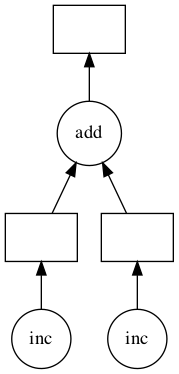

In [8]:
# 将以上计算构建成一个任务图
z.visualize()

## 思考


如果 inc 和 add 函数不包含sleep(1)? Dask 还能加速这段代码吗？

如果我们有多个输出或者还想访问 x 或 y 怎么办？

## 并行For循环

In [13]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [15]:
%%time
# 串行代码
results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)
total

CPU times: user 499 ms, sys: 80.5 ms, total: 580 ms
Wall time: 8.02 s


44

In [18]:
%%time
# 并行代码
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)
print("Before computing:", total) 
result = total.compute()
print("After computing :", result) 

Before computing: Delayed('sum-430f256c-cb70-401a-b5c7-a14375853a71')
After computing : 44
CPU times: user 90.3 ms, sys: 14.4 ms, total: 105 ms
Wall time: 1.03 s


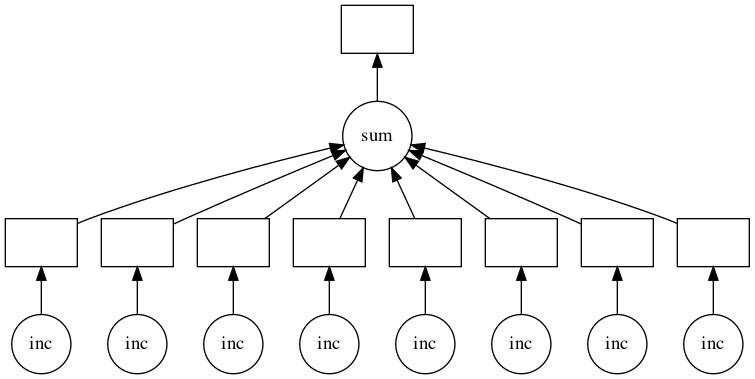

In [19]:
total.visualize()

In [20]:
client.shutdown()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
